# **48-World Cup-Event Data SOC**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager
from mplsoccer import Pitch, VerticalPitch
import matplotlib.patches as mpatches
from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime

In [9]:
from ast import literal_eval


In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/sonofacorner/soc-viz-of-the-week/main/12262022/data/world_cup_data.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:

# saving the dataframe
df.to_csv('Worldcup.csv')

In [3]:
df.head()

,event_id,minute,second,team_id,x,y,expanded_minute,period,outcome_type,qualifiers,...,card_type,is_goal,player_name,event_type,pass_recipient,team_name,match_date,match_id,match_string,is_own_goal
0,2.488145e+09,0,0.0,771,49.9,50.5,0,FirstHalf,Successful,"[{'Zone': 'Back'}, {'Length': '10.8'}, {'Angle...",...,NaN,NaN,Aleksandar Mitrovic,Pass,Sasa Lukic,Serbia,2022-11-28T10:00:00,1632117,Cameroon - Serbia,NaN
1,2.488145e+09,0,1.0,771,34.3,59.4,0,FirstHalf,Successful,"[{'Length': '13.8'}, {'Zone': 'Back'}, {'Stand...",...,NaN,NaN,Sasa Lukic,Pass,Strahinja Pavlovic,Serbia,2022-11-28T10:00:00,1632117,Cameroon - Serbia,NaN
2,2.488145e+09,0,4.0,771,25.7,74.1,0,FirstHalf,Successful,"[{'PassEndX': '24.9'}, {'Angle': '4.7'}, {'Zon...",...,NaN,NaN,Strahinja Pavlovic,Pass,Milos Veljkovic,Serbia,2022-11-28T10:00:00,1632117,Cameroon - Serbia,NaN
3,2.488145e+09,0,7.0,771,23.5,42.8,0,FirstHalf,Successful,"[{'StandingSave': True}, {'PassEndY': '14.6'},...",...,NaN,NaN,Milos Veljkovic,Pass,Nikola Milenkovic,Serbia,2022-11-28T10:00:00,1632117,Cameroon - Serbia,NaN
4,2.488145e+09,0,9.0,771,19.3,12.9,0,FirstHalf,Successful,"[{'Angle': '5.6'}, {'StandingSave': True}, {'L...",...,NaN,NaN,Nikola Milenkovic,Pass,Andrija Zivkovic,Serbia,2022-11-28T10:00:00,1632117,Cameroon - Serbia,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103569 entries, 0 to 103568
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   event_id                103569 non-null  float64
 1   minute                  103569 non-null  int64  
 2   second                  103315 non-null  float64
 3   team_id                 103569 non-null  int64  
 4   x                       103569 non-null  float64
 5   y                       103569 non-null  float64
 6   expanded_minute         103569 non-null  int64  
 7   period                  103569 non-null  object 
 8   outcome_type            103569 non-null  object 
 9   qualifiers              103569 non-null  object 
 10  satisfied_events_types  103569 non-null  object 
 11  is_touch                103569 non-null  bool   
 12  player_id               103569 non-null  float64
 13  end_x                   71176 non-null   float64
 14  end_y               

In [7]:
df.loc[0,'qualifiers']

"[{'Zone': 'Back'}, {'Length': '10.8'}, {'Angle': '2.3'}, {'PassEndX': '42.7'}, {'PassEndY': '61.8'}, {'StandingSave': True}]"

In [13]:
df.loc[0,'satisfied_events_types']

"['touches', 'passAccurate', 'shortPassAccurate', 'passBack', 'passLeft', 'midThird', 'pos']"

In [10]:
df['qualifiers'] = [literal_eval(x) for x in df['qualifiers']]
df['satisfied_events_types'] = [literal_eval(x) for x in df['satisfied_events_types']]

In [17]:
df.loc[0,'qualifiers']

[{'Zone': 'Back'},
 {'Length': '10.8'},
 {'Angle': '2.3'},
 {'PassEndX': '42.7'},
 {'PassEndY': '61.8'},
 {'StandingSave': True}]

In [307]:
df.team_name.unique()

array(['Serbia', 'Cameroon', 'South Korea', 'Ghana', 'Switzerland',
       'Brazil', 'Uruguay', 'Portugal', 'Netherlands', 'Qatar', 'Ecuador',
       'Senegal', 'Iran', 'USA', 'Wales', 'England', 'Tunisia', 'France',
       'Denmark', 'Australia', 'Poland', 'Argentina', 'Mexico',
       'Saudi Arabia', 'Croatia', 'Belgium', 'Morocco', 'Canada', 'Spain',
       'Japan', 'Germany', 'Costa Rica'], dtype=object)

In [5]:
codes = { "Russia" :8713,  "Mexico" : 6710,"Uruguay" :5796, "Argentina" :  6706, "Brazil" :8256,
"Germany" : 8570,
"Portugal" : 8361,
"Serbia" : 8205,
"South Korea" : 7804,"Belgium" : 8263,"France" : 6723,"Spain" : 6720,
         "Croatia" :10155 , "Nigeria" :6346 ,"Mexico" :6710 ,"England" : 8491,
 "Costa Rica" :6705,"Senegal": 6395,"Canada" :5810,"Morocco":6262,"Netherlands":6708,
         
"Japan" :6715,"Iran":6711,"USA" :6713,"Wales":5790,"Tunisia": 6719,
"Qatar" :5902,"Ecuador": 6707,"Denmark" :8238,"Australia": 6716,"Saudi Arabia":7795,'Croatia': 10155     }


## Viz 1. Passes


In [6]:
df["player_name"].unique()

array(['Aleksandar Mitrovic', 'Sasa Lukic', 'Strahinja Pavlovic',
       'Milos Veljkovic', 'Nikola Milenkovic', 'Andrija Zivkovic',
       'Collins Fai', 'Martin Hongla', 'Devis Epassy',
       'Jean-Charles Castelletto', 'Eric Choupo-Moting', 'Pierre Kunde',
       'André-Frank Zambo Anguissa', 'Sergej Milinkovic-Savic',
       'Filip Kostic', 'Nicolas Nkoulou', 'Nouhou Tolo',
       'Vanja Milinkovic-Savic', 'Nemanja Maksimovic', 'Dusan Tadic',
       'Karl Toko Ekambi', 'Bryan Mbeumo', 'Christian Bassogog',
       'Luka Jovic', 'Vincent Aboubakar', 'Stefan Mitrovic',
       'Gaël Ondoua', 'Srdjan Babic', 'Nemanja Radonjic', 'Marko Grujic',
       'Samuel Oum Gouet', 'Georges-Kévin Nkoudou', 'Filip Djuricic',
       'Jeong Woo-Yeong', 'Jung Woo-Young', 'Kim Moon-Hwan',
       'Kim Young-Gwon', 'Kim Jin-Su', 'Mohammed Kudus',
       'Lawrence Ati-Zigi', 'Salis Abdul Samed', 'Daniel Amartey',
       'Thomas Partey', 'Jordan Ayew', 'André Ayew', 'Gideon Mensah',
       'Mohammed Salisu

Enter Player Name :  Rodri


Rodri


Pick an option:
1) Spain - Costa Rica
2) Spain - Germany
3) Japan - Spain
4) Morocco - Spain
5) All
Your choice:  5


You picked: All


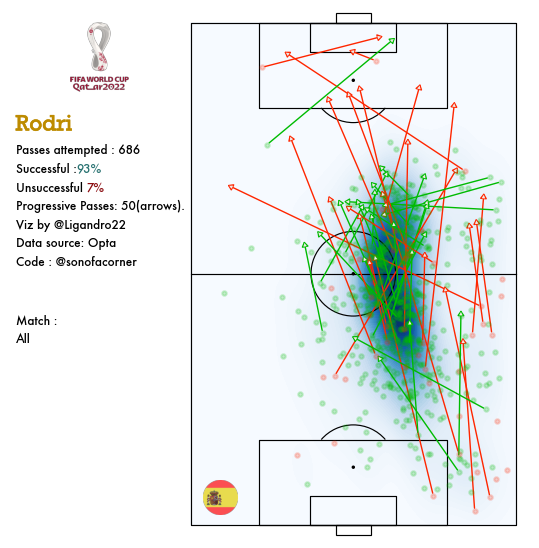

In [106]:
# Filter out corners and throw-ins.
data_passes = df.copy()
data_passes['is_throw_or_corner'] = False
for index, row in enumerate(data_passes['qualifiers']):
    for element in row:
        if 'ThrowIn' in element.keys() or 'CornerTaken' in element.keys():
            data_passes.at[index, 'is_throw_or_corner'] = True


data_passes = data_passes[(data_passes['event_type'] == 'Pass') & (~data_passes['is_throw_or_corner']) ]

x = input("Enter Player Name : ")
print(x)

player_name = x

data_passes = data_passes[data_passes ["player_name"] == x ]
data_passes = data_passes.sort_values("match_date")


team_name = data_passes.iloc[0,27]


data_most_passes = (data_passes
    .groupby(['match_id', 'match_string']).size()
    .reset_index(name='total_passes')
    .sort_values(by='total_passes', ascending=False)
    .reset_index(drop=True)
)

def check_if_pass_is_progressive(x, y, end_x, end_y):
    '''
    This function returns "True" if the pass meets the criteria
    for a progressive pass.
    '''
    # -- Start position
    height_start = abs(x - 100)
    length_start = abs(y - 50)
    distance_sq_start = height_start**2 + length_start**2
    distance_start = distance_sq_start**(1/2)
    # -- End position
    height_end = abs(end_x - 100)
    length_end = abs(end_y - 50)
    distance_sq_end = height_end**2 + length_end**2
    distance_end = distance_sq_end**(1/2)
    # -- Calculate change in distance
    delta_distance = distance_end/distance_start - 1
    if delta_distance <= -0.25:
        return True
    else:
        return False
data_passes['is_progressive'] = data_passes.apply(lambda x: 
                                                  check_if_pass_is_progressive(x['x'], x['y'],
                                                                               x['end_x'], x['end_y']),
                                                  axis=1)



data_most_passes = (
    data_passes[data_passes['is_progressive'] == True]
    .groupby(['match_id', 'player_name', 'player_id', 'match_string']).size()
    .reset_index(name='total_prog')
    .sort_values(by='total_prog', ascending=False)
    .reset_index(drop=True)
)


matches = data_passes.match_string.unique() 
matches = np.append(matches,"All")
numbers = [ x for x in range(1,len(matches)+2)]

user_input = 0

input_message = "Pick an option:\n"

for index, item in enumerate(matches):
    input_message += f'{index+1}) {item}\n'

input_message += 'Your choice: '

while user_input not in numbers:
    user_input = int(input(input_message))

print('You picked: ' + matches[int(user_input) -1])

if user_input == len(matches):
    pass
else :
    data_passes = data_passes[data_passes.match_string == matches[int(user_input) -1] ]



total = len(data_passes)
data_most_passes = (
    data_passes[data_passes['is_progressive'] == True]
    .groupby(['match_id', 'player_name', 'player_id', 'match_string']).size()
    .reset_index(name='total_prog')
    .sort_values(by='total_prog', ascending=False)
    .reset_index(drop=True)
)
data_most_passes
prog = data_most_passes.total_prog.sum()

clubs = codes[team_name]


colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)



fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)

pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='black',
)
pitch.draw(ax = ax)

# - We need to invert the coordinates because of the Vertical Pitch!!
for index, pass_made in data_passes.iterrows():
    if pass_made['is_progressive']:
        if pass_made['outcome_type'] == 'Successful':
            color = '#00BB02'
        else:
            color = '#FF2600'
        x = pass_made['y']
        y = pass_made['x']
        dx = pass_made['end_y']
        dy = pass_made['end_x']
        pass_arrow = mpatches.FancyArrowPatch((x,y), (dx, dy), ec='None',
                                            fc='#efe9e6',arrowstyle='-|>,head_length=2.6,head_width=1.2', zorder=4)
        ax.add_patch(pass_arrow)
        pass_arrow = mpatches.FancyArrowPatch((x,y), (dx, dy), ec=color,
                                            fc='None',arrowstyle='-|>,head_length=3,head_width=2', zorder=2)
        ax.add_patch(pass_arrow)

        
pitch.kdeplot(
    data_passes.x, data_passes.y, 
    ax=ax, shade=True, 
    levels=60, shade_lowest=True,
    cut=4, zorder=-1, cmap='Blues')


# -- We plot the scatter (also with inverted coords)
df_plot_passes_succ = data_passes[data_passes['outcome_type'] == 'Successful']
df_plot_passes_unsucc = data_passes[data_passes['outcome_type'] != 'Successful']
ax.scatter(df_plot_passes_succ.y, df_plot_passes_succ.x, s=10, alpha=0.2, lw=1.5, color='#00BB02', zorder=3)
ax.scatter(df_plot_passes_unsucc.y, df_plot_passes_unsucc.x, s=10, alpha=0.2, lw=1.5, color='#FF2600', zorder=3)


# -- Add Fancy Logo and Text
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((80,2))
ax_size = .05
image_ax = fig.add_axes(
    [ax_coords[0], ax_coords[1], ax_size, ax_size],
    fc='None'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{clubs}.png"))
image_ax.imshow(player_face)
image_ax.axis("off")



succes_rate = df_plot_passes_succ.shape[0]/(data_passes.shape[0])

str_text = f'''Passes attempted : {total}\nSuccessful :<{succes_rate:.0%}>\nUnsuccessful <{1-succes_rate:.0%}>\nProgressive Passes: {prog}(arrows).
Viz by @Ligandro22\nData source: Opta\nCode : @sonofacorner'''

fig_text(
    x = 0.03, y = .7, 
    s = f'<{player_name}>',
    highlight_textprops=[{"color":"#BD8B00", "style":"italic"}],
    fontname ="Rockwell",path_effects=[path_effects.Stroke(linewidth=0.4, foreground="#BD8B00"), path_effects.Normal()],
    va = 'bottom', ha = 'left',
    fontsize = 15,  weight = 'bold',color="black"
)

fig_text(
    x = 0.03, y = 0.51, 
    s = str_text,highlight_textprops=[{'color':'#287271', 'weight':'bold'}, {'color':'#8B0D11', 'weight':'bold'}],
    va = 'bottom', ha = 'left',fontname ="Futura",
    fontsize = 8.5,color ='black'
)

# add image
im1 = plt.imread('/Users/ligandrosy/Downloads/22wc.png')
ax_image = add_image(
          im1, fig, left=0.1, bottom=0.762, width=0.1, height=0.1
    )   # these values might differ when you are plotting

fig_text(
    x = 0.03, y = .4, 
    s = f'Match :\n{matches[int(user_input) -1]}',
    fontname ="Futura",
    va = 'bottom', ha = 'left',
    fontsize = 8.5,  weight = 'bold',color="black"
)


        
#plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')
